<a href="https://colab.research.google.com/github/Rutujaborawake29/LGMVIP-DataScience/blob/main/lgmvip_task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lets Grow More Virtual Internship Program**

Data Science Intern

Author-Rutuja Borawake

Task no-7

Level-Beginner

Task Name-Music Recommendation

# **Importing Libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# **Import Data**


In [2]:
from google.colab import files
upload=files.upload()

Saving songs.csv to songs.csv


In [9]:
from google.colab import files
upload=files.upload()

Saving member.csv to member.csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
member=pd.read_csv('member.csv')
songs=pd.read_csv('songs.csv')
train=pd.read_csv('train.csv')

In [11]:
member.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [12]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [13]:
train.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [15]:
train.info()
songs.info()
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312826 entries, 0 to 312825
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                312826 non-null  object 
 1   song_id             312826 non-null  object 
 2   source_system_tab   311934 non-null  object 
 3   source_screen_name  298588 non-null  object 
 4   source_type         312193 non-null  object 
 5   target              312825 non-null  float64
dtypes: float64(1), object(5)
memory usage: 14.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
<class 'pandas.core.frame.D

In [16]:

train.describe()

,target
count,312825.000000
mean,0.740046
std,0.438610
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [17]:
# get statistical summaries of dataset
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [18]:
member.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [19]:

train.shape

(312826, 6)

In [20]:

songs.shape

(2296320, 7)

In [22]:
member.shape

(34403, 7)

# **Data Visualization**

<Axes: xlabel='source_system_tab', ylabel='count'>

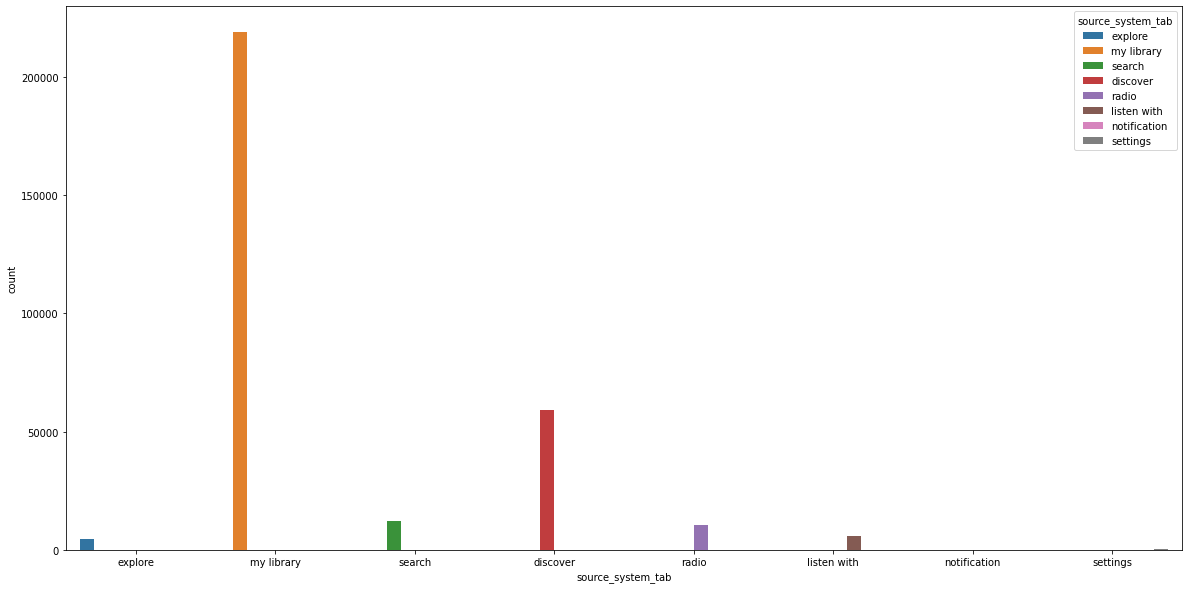

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

<Axes: xlabel='source_system_tab', ylabel='count'>

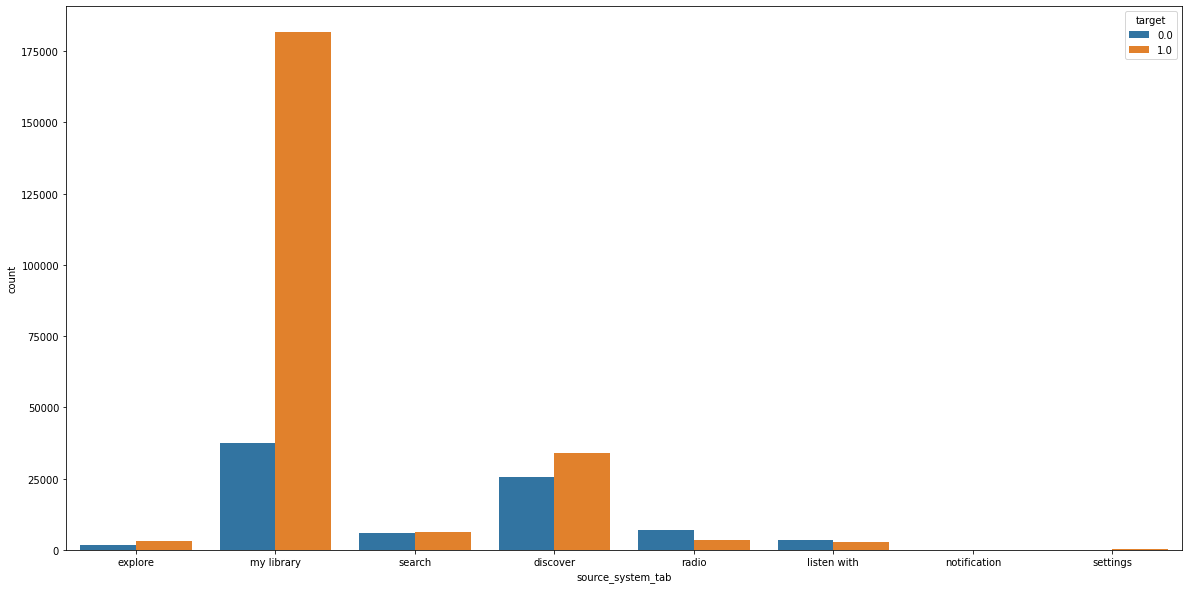

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='target', data=train)


<Axes: xlabel='source_screen_name', ylabel='count'>

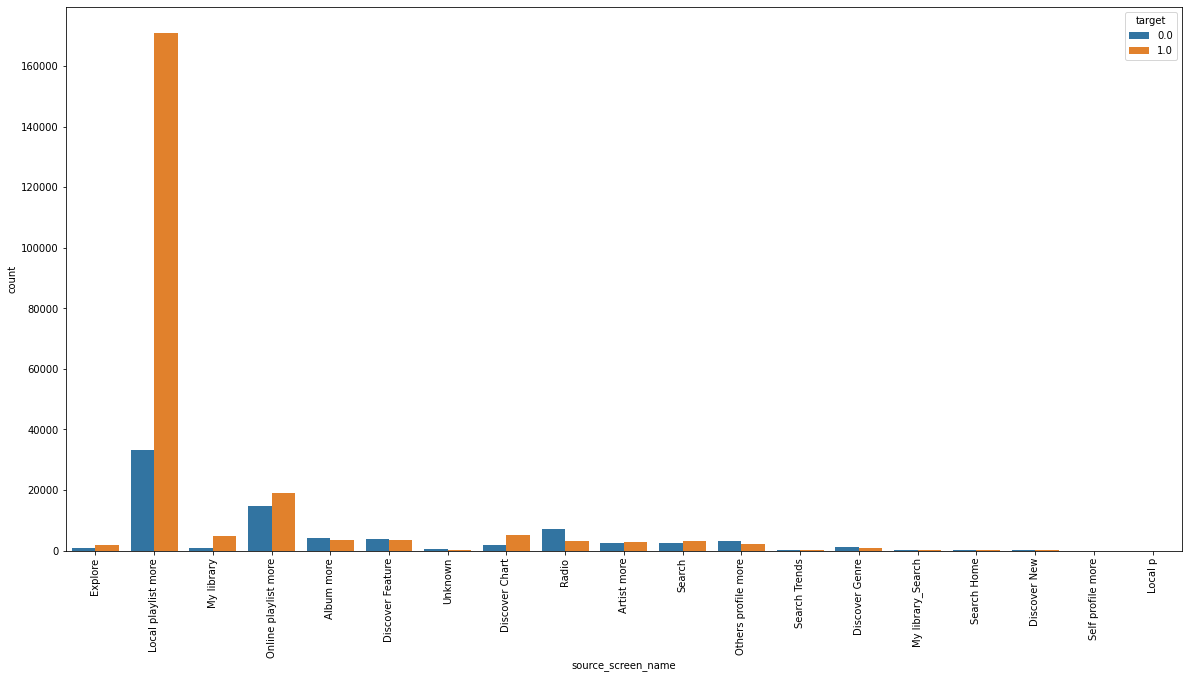

In [25]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target',data=train)


<Axes: xlabel='source_type', ylabel='count'>

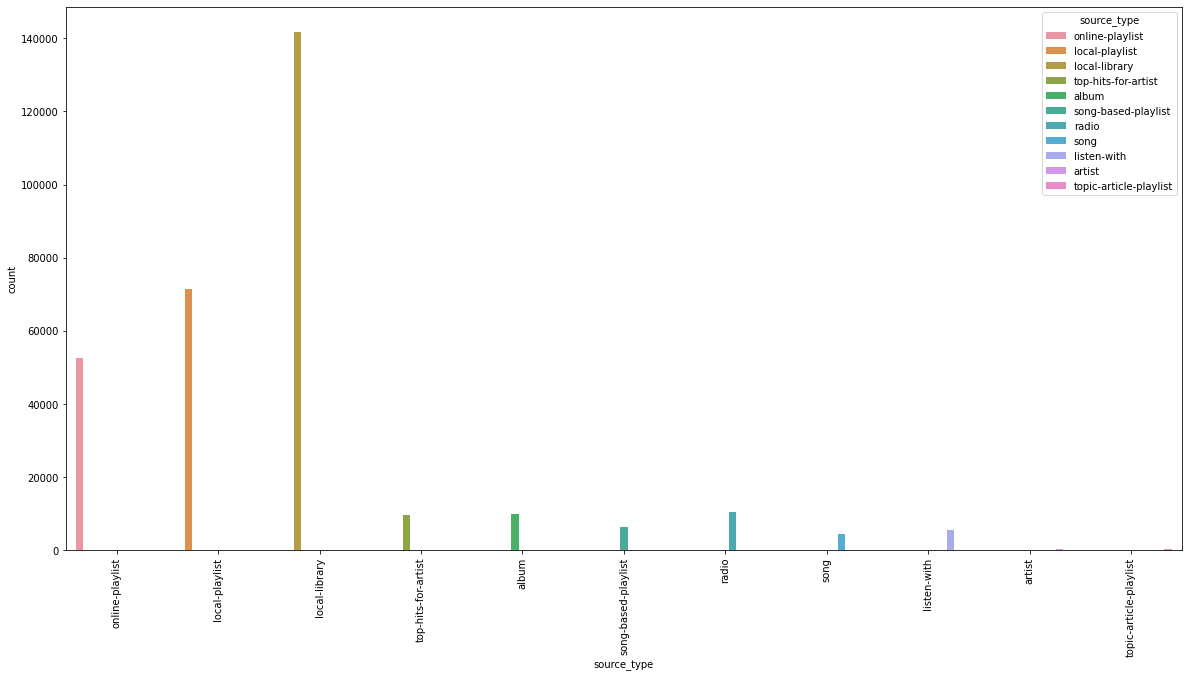

In [26]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type',data=train)

<Axes: xlabel='source_type', ylabel='count'>

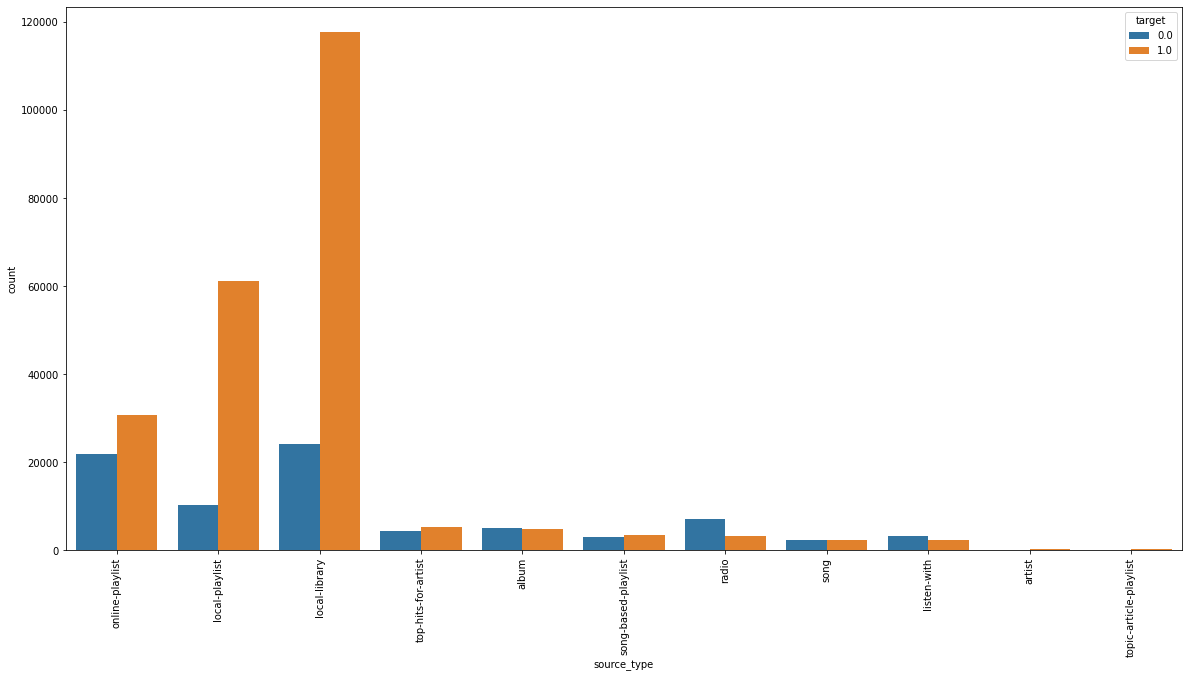

In [27]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target',data=train)


<Axes: xlabel='language', ylabel='count'>

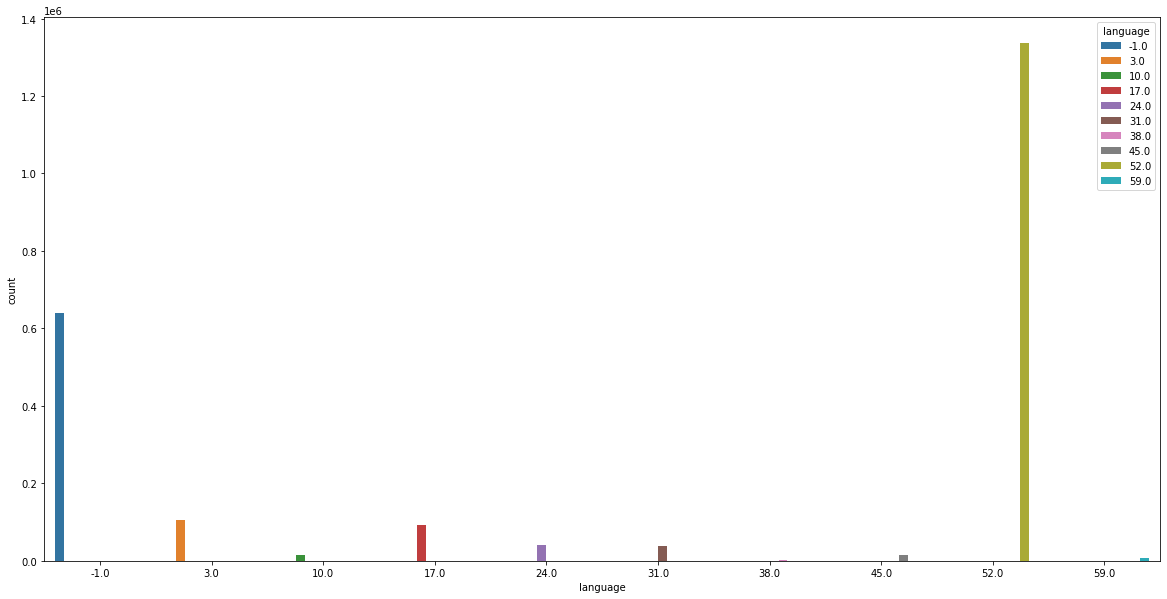

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='language', hue='language',data=songs)


<Axes: xlabel='registered_via', ylabel='count'>

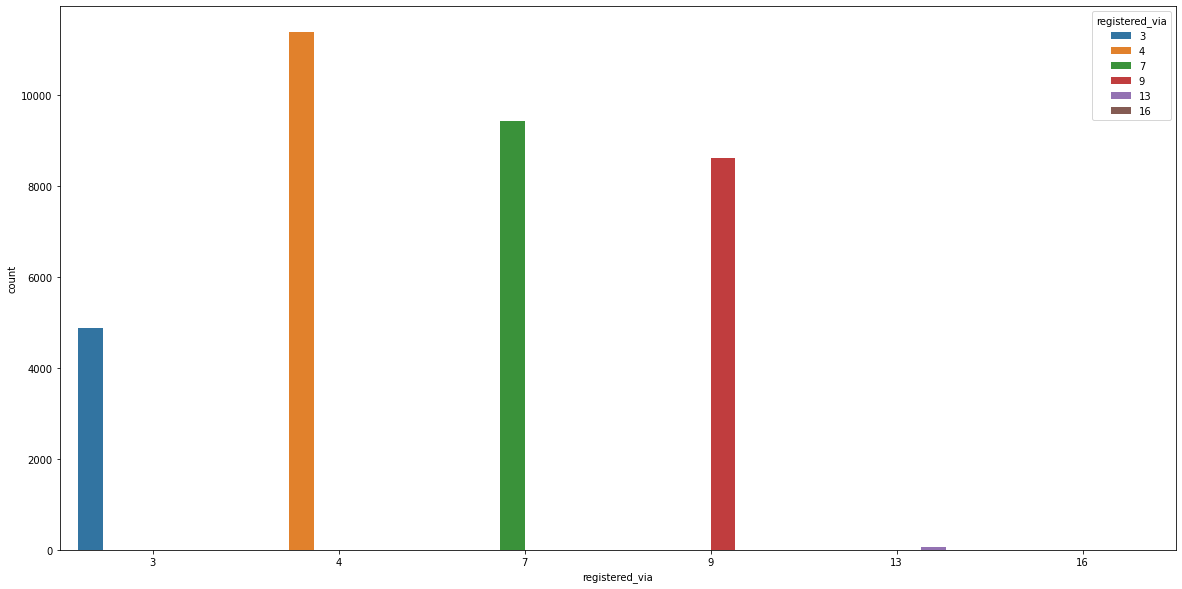

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via', hue='registered_via',data=member)

# **Data Cleaning**

In [32]:
ntr = 7000
nts = 3000
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names=names,skiprows=ntr,nrows=nts)


In [33]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [34]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]



In [35]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')


In [36]:
member['registration_year'] = member['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
member['registration_month'] = member['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
member['registration_date'] = member['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [37]:
member['expiration_year'] = member['expiration_date'].apply(lambda x: int(str(x)[0:4]))
member['expiration_month'] = member['expiration_date'].apply(lambda x: int(str(x)[4:6]))
member['expiration_date'] = member['expiration_date'].apply(lambda x: int(str(x)[6:8]))
member = member.drop(['registration_init_time'], axis=1)

In [41]:
member_cols = member.columns
train = train.merge(member[member_cols], on='msno', how='left')
test = test.merge(member[member_cols], on='msno', how='left')

In [42]:
train = train.fillna(-1)
test = test.fillna(-1)

In [44]:
import gc
del member, songs; gc.collect();

In [45]:
cols = list(train.columns)
cols.remove('target')

In [46]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:03<00:00,  5.15it/s]


In [47]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# **Building model**

In [48]:
pip install lightgbm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [50]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
predict(LogisticRegression())



Training Score : 0.7403309618779369
Accuracy on test data for the model 74.9


# **Prediction** **using** **LightGBM**


In [53]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 10 rounds
[10]	training's auc: 0.857191	valid_1's auc: 0.835046
[20]	training's auc: 0.885154	valid_1's auc: 0.852631
[30]	training's auc: 0.905817	valid_1's auc: 0.862489
[40]	training's auc: 0.917035	valid_1's auc: 0.866331
[50]	training's auc: 0.928162	valid_1's auc: 0.870114
[60]	training's auc: 0.936295	valid_1's auc: 0.87126
[70]	training's auc: 0.944294	valid_1's auc: 0.871716
[80]	training's auc: 0.950983	valid_1's auc: 0.873159
Early stopping, best iteration is:
[78]	training's auc: 0.949714	valid_1's auc: 0.873484


In [54]:
p_test = model1.predict(X_test)

In [55]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 89.500000%
